In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors, tree, naive_bayes, preprocessing
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

A) Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [8]:
# Load in data and drop first column for id
bank_data = pd.read_csv("bank_data.csv")
bank_data = bank_data.drop('id', 1)
bank_data

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
596,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
597,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES
598,29,14711.80,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO


In [9]:
# Separating target attribute pep from the portion of the data to be used for training and testing
pep_col = bank_data['pep']
bank_data = bank_data.drop('pep',1)
pep_col

0      YES
1       NO
2       NO
3       NO
4       NO
      ... 
595     NO
596     NO
597    YES
598     NO
599    YES
Name: pep, Length: 600, dtype: object

In [10]:
# Converting bank data into Standard Spreadsheet format
bank_dataSSF = pd.get_dummies(bank_data,columns=['gender','region', 'married','car','savings_acct','current_acct','mortgage'])
bank_dataSSF

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,48,17546.00,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,40,30085.10,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,51,16575.40,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,23,20375.40,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,57,50576.30,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,47025.00,2,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
596,30,9672.25,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
597,31,15976.30,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
598,29,14711.80,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1


In [54]:
# using 80%-20% randomized split to transform data into training and test sets

bank_data_train, bank_data_test, pep_train, pep_test = train_test_split(bank_dataSSF, pep_col, test_size=0.2, random_state=33)
bank_data_test

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
456,32,13267.6,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
366,59,29866.9,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
131,61,41609.5,3,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1
448,53,48971.6,3,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
337,65,38080.9,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,18,12117.3,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0
492,61,27756.3,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1
177,41,30099.3,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1
215,27,17610.3,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0


In [55]:
pep_test

456     NO
366    YES
131     NO
448    YES
337     NO
      ... 
438     NO
492    YES
177    YES
215     NO
516    YES
Name: pep, Length: 120, dtype: object

B) Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

In [56]:
# Normalizing data with min-max normalization for KNN
min_max_scaler = preprocessing.MinMaxScaler().fit(banK_data_train)
bank_data_norm = min_max_scaler.transform(banK_data_train)
bank_data_test_norm = min_max_scaler.transform(bank_data_test)

np.set_printoptions(precision=2, linewidth=80, suppress=True)
bank_data_norm

array([[0.57, 0.46, 0.67, ..., 1.  , 1.  , 0.  ],
       [0.8 , 0.78, 0.  , ..., 0.  , 1.  , 0.  ],
       [0.14, 0.16, 0.  , ..., 1.  , 1.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 1.  ],
       [0.45, 0.28, 0.  , ..., 1.  , 1.  , 0.  ],
       [0.88, 0.91, 0.67, ..., 0.  , 1.  , 0.  ]])

In [57]:
bank_data_test_norm

array([[0.29, 0.12, 0.  , ..., 1.  , 0.  , 1.  ],
       [0.84, 0.41, 0.33, ..., 1.  , 1.  , 0.  ],
       [0.88, 0.62, 1.  , ..., 1.  , 0.  , 1.  ],
       ...,
       [0.47, 0.42, 0.  , ..., 1.  , 0.  , 1.  ],
       [0.18, 0.2 , 0.  , ..., 1.  , 1.  , 0.  ],
       [0.35, 0.25, 0.  , ..., 0.  , 1.  , 0.  ]])

In [58]:
# Referenced from code from example notebooks provided

# Use KNN classifier on the test set after normalization
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_data_norm, pep_train)

KNeighborsClassifier(weights='distance')

In [59]:
knnpreds_test = knnclf.predict(bank_data_test_norm)

In [60]:
# classification report
print(classification_report(pep_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.68      0.73      0.70        66
         YES       0.63      0.57      0.60        54

    accuracy                           0.66       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.66      0.66      0.66       120



In [61]:
# Confusion matrix
knncm = confusion_matrix(pep_test, knnpreds_test)
print (knncm)

[[48 18]
 [23 31]]


In [81]:
# average accuracy score for test data
print (knnclf.score(bank_data_test_norm, pep_test))

0.6333333333333333


In [82]:
# average accuracy score for test data
print (knnclf.score(bank_data_norm, pep_train))

0.7354166666666667


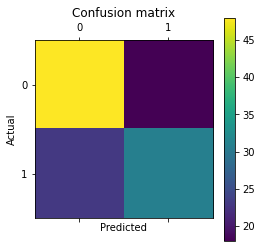

In [63]:
# Visualizing confusion matrix using matplotlib
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [64]:
# testing with different values of K for KNN with weigthing

test = []
train = []
results = {}

for i in range(1,16):
    k = i
    knnclf = neighbors.KNeighborsClassifier(k, weights='distance')
    knnclf.fit(bank_data_norm, pep_train)
    trainScore = knnclf.score(bank_data_norm, pep_train)
    testScore = knnclf.score(bank_data_test_norm, pep_test)
    train.append(trainScore)
    test.append(testScore)
    
results["train"] = train
results["test"] = test
withWeighting = pd.DataFrame(results, columns=['train', 'test'])
withWeighting

,train,test
0,1.0,0.633333
1,1.0,0.633333
2,1.0,0.641667
3,1.0,0.641667
4,1.0,0.658333
5,1.0,0.650000
6,1.0,0.650000
7,1.0,0.633333
8,1.0,0.650000
9,1.0,0.650000


In [65]:
# testing with different values of K for KNN without weigthing

test = []
train = []
results = {}

for i in range(1,16):
    k = i
    knnclf = neighbors.KNeighborsClassifier(k)
    knnclf.fit(bank_data_norm, pep_train)
    trainScore = knnclf.score(bank_data_norm, pep_train)
    testScore = knnclf.score(bank_data_test_norm, pep_test)
    train.append(trainScore)
    test.append(testScore)
    
results["train"] = train
results["test"] = test
withoutWeighting = pd.DataFrame(results, columns=['train', 'test'])
withoutWeighting

,train,test
0,1.000000,0.633333
1,0.827083,0.625000
2,0.810417,0.658333
3,0.756250,0.658333
4,0.783333,0.666667
5,0.762500,0.650000
6,0.777083,0.650000
7,0.768750,0.683333
8,0.770833,0.675000
9,0.768750,0.691667


When comparing the different experiments when changing the K values from 1 to 15 and using weighting or not, I found that the results were relatively similar in terms of the testing column. However, when weighting is used the training column would always give an accuracy score of 1 which is a sign of overfitting where the accuracy is too closely fit to the data. When weighting was not used the training accuracy score ranged from 0.73 to 0.82. For the testing accuracy scores, the weighted scores on average were lower than the non weighted as the weighted scores never reached past 0.65. In short, I think that K values in range 7 - 9 without weighting provided the best results for the testing accuracy score and training accuracy score as it provides a high score and doesn't overfit the data.

C) Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy scores for each classifier. For each model, compare the average accuracy scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

In [66]:
# Using decision tree classifier
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(bank_data_train, pep_train)

In [67]:
treepreds_test = treeclf.predict(bank_data_test)
print (treepreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [68]:
# classification report for decision tree
print(classification_report(pep_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.80      0.85      0.82        66
         YES       0.80      0.74      0.77        54

    accuracy                           0.80       120
   macro avg       0.80      0.79      0.80       120
weighted avg       0.80      0.80      0.80       120



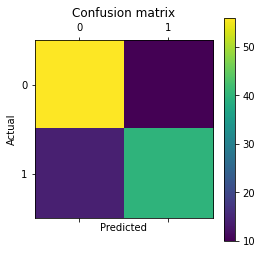

In [70]:
# Confusion matrix for decision tree
treem = confusion_matrix(pep_test, treepreds_test)
# Visualizing confusion matrix using matplotlib
plt.matshow(treem)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [71]:
# average accuracy score for test data
print (treeclf.score(bank_data_test, pep_test))

0.8


In [76]:
# average accuracy score for training data
print (treeclf.score(bank_data_train, pep_train))

1.0


In [72]:
# Using (Gaussian) Naive Bayes Classifier
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_data_train, pep_train)
nbpreds_test = nbclf.predict(bank_data_test)
print (nbpreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO']


In [77]:
# average accuracy score for training data
print (nbclf.score(bank_data_train, pep_train))

0.65625


In [78]:
# average accuracy score for test data
print (nbclf.score(bank_data_test, pep_test))

0.5916666666666667


In [79]:
# classification report for (Gaussian) Naive Bayes
print(classification_report(pep_test, nbpreds_test))

              precision    recall  f1-score   support

          NO       0.60      0.74      0.67        66
         YES       0.56      0.41      0.47        54

    accuracy                           0.59       120
   macro avg       0.58      0.57      0.57       120
weighted avg       0.59      0.59      0.58       120



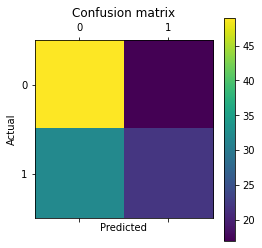

In [80]:
# Confusion matrix for (Gaussian) Naive Bayes
nbcm = confusion_matrix(pep_test, nbpreds_test)
# Visualizing confusion matrix using matplotlib
plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

When comparing the averages of accuracy scores between the decision tree classifier and Naive Bayes classifier, the decision tree yields a higher score. Similar to the KNN classifier for the training data, the average score is at 1.0 for the decision tree. In terms of bias-variance trade off, we would want to use the decision tree to reduce variance as the average scores are high and biased towards the data. The Naive Bayes classifier does not reduce variance as much as the average scores are lower and not as biased towards the data.

D) Discuss your observations based on the above experiments.

When comparing the three classifiers, I found that they yielded similar results but the decision tree classifier had the highest average score for the test and training data followed by the KNN classifier and then Naive Bayes. It is important to note that when changing the values for K and the weight method in the KNN classifier it did not change the scores that much in terms of the test data but using a weighted method greatly improved the training data scores. This can be said for the decision tree classifier as well as the average score for the training data was 1.0. These high scores can cause overfitting and may not be very good to use as a classifier for other data sets. For the Naive bayes classifier, the lower values can be seen as not high enough to be considered accurate for both the training and testing data. Even though they are not high enough to be considered overfitting, some cases may deem the scores too low to be considered accurate. Overall, I think the best classifer to use in this situation is the KNN classifier with K values between 7-9 and with no weighting. This is because the training scores were high but not high enough to be considered overfitting and the training data scores were slightly higher than the values when using weighted method on the same data.